<a href="https://colab.research.google.com/github/rigonzal/ML-2019-1/blob/master/Tarea1/Pregunta1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INF-393: Máquinas de Aprendizaje
## Tarea 1 - Pregunta 1
### 26-04-2019


* Rodrigo González - 201303026-2
* Ignacio Valenzuela - 2014737


# Introducción

# 1. Aprendizaje con regresión lineal.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
df = pd.read_csv("gdrive/My Drive/2019-1/ML/Pregunta 1/BlackFriday.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


## 1.a Modulos y carga de datos

* Análisis casos datos indefinidos

In [3]:
print("El total de datos es: " + str(len(df)))
print("Cantidad de datos nulos según columna: ")
print(df.isna().sum())

El total de datos es: 537577
Cantidad de datos nulos según columna: 
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64


Vemos que sería adecuado eliminar los atributos correspondientes a la categoría 2 y 3 del producto, dado que además de ser los únicos que contienen valores nulos, son muchos estos casos. 

* Descripción set de datos.

Iniciamos analizando las columnas:

In [4]:
print(df.describe())

            User_ID    Occupation  Marital_Status  Product_Category_1  \
count  5.375770e+05  537577.00000   537577.000000       537577.000000   
mean   1.002992e+06       8.08271        0.408797            5.295546   
std    1.714393e+03       6.52412        0.491612            3.750701   
min    1.000001e+06       0.00000        0.000000            1.000000   
25%    1.001495e+06       2.00000        0.000000            1.000000   
50%    1.003031e+06       7.00000        0.000000            5.000000   
75%    1.004417e+06      14.00000        1.000000            8.000000   
max    1.006040e+06      20.00000        1.000000           18.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       370591.000000       164278.000000  537577.000000  
mean             9.842144           12.669840    9333.859853  
std              5.087259            4.124341    4981.022133  
min              2.000000            3.000000     185.000000  
25%              5.000000  

De lo anterior podemos listar métricas interesantes como:
  *   El promedio de compra el cual corresponde a  alrededor de $ 9333.
  *  También podemos ciertos sesgos por medio de los cuartiles respecto a la ocupación y la categoría de producto. Lo cual analizaremos mejor con histogramas:

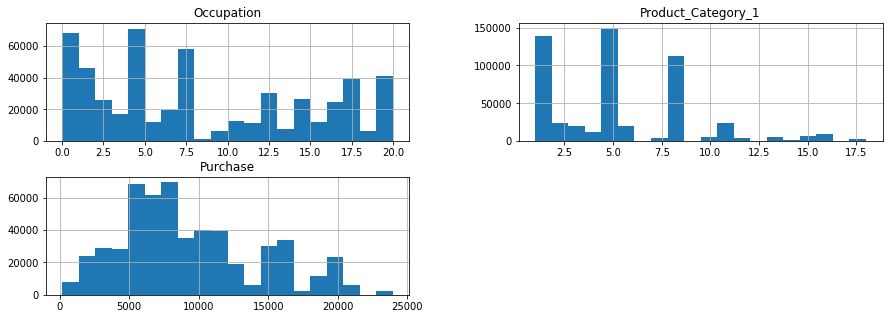

In [0]:
_ = df.hist(column=['Occupation','Product_Category_1', 'Purchase'],bins = 20, figsize=(15,5))

Se puede notar una concentración para la ocupación y categoría del producto para pocos valores. Por otra parte para las compras un pequeño rango resalta como el más dominante.

* Ahora bien contamos la cantidad de hombres y mujeres únicos en los registros.

In [0]:
print(df.groupby(["Gender"]).User_ID.nunique())

Gender
F    1666
M    4225
Name: User_ID, dtype: int64


Donde notamos que existe una cantidad mucho mayor de población masculina.

In [0]:
W.values

array([9020.12687836, 9235.19757462, 9314.58897014, 9401.47875794,
       9284.87227687, 9620.6166197 , 9453.89857915])

Age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: Purchase, dtype: float64


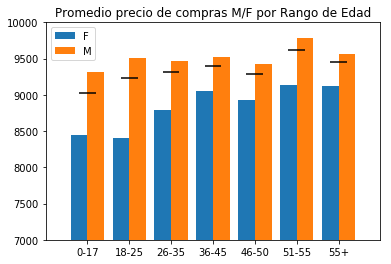

In [0]:
W = df.groupby(["Age"]).mean()['Purchase']
print(W)
X = df.groupby(["Age"]).mean()['Purchase'].index.values
Y = df[df.Gender == 'F'].groupby(["Age","Gender"]).mean()['Purchase']
Z = df[df.Gender == 'M'].groupby(["Age","Gender"]).mean()['Purchase']

_X = np.arange(len(X))
#plt.figure(num=None, figsize=(8, 6))
plt.title("Promedio precio de compras M/F por Rango de Edad")
_ =plt.bar(_X - 0.2, Y, 0.4, label = 'F' ,)
_ =plt.bar(_X + 0.2 , Z, 0.4, label = 'M')
_= plt.axis([-1,7,7000,10000])
_ =plt.legend(loc='best')
_ = plt.hlines(W.values,np.arange(10) - 0.2,np.arange(10) + 0.2)
_ =plt.xticks(_X, X) # set labels manually

## 1.b Columnas descartadas

In [0]:
pd.DataFrame({'Tipo':df.dtypes.values,'Valores únicos':[df[col].unique() for col in df.columns], 'Total':[len(df[col].unique()) for col in df.columns]}, index = df.columns )


,Tipo,Valores únicos,Total
User_ID,int64,"[1000001, 1000002, 1000003, 1000004, 1000005, ...",5891
Product_ID,object,"[P00069042, P00248942, P00087842, P00085442, P...",3623
Gender,object,"[F, M]",2
Age,object,"[0-17, 55+, 26-35, 46-50, 51-55, 36-45, 18-25]",7
Occupation,int64,"[10, 16, 15, 7, 20, 9, 1, 12, 17, 0, 3, 4, 11,...",21
City_Category,object,"[A, C, B]",3
Stay_In_Current_City_Years,object,"[2, 4+, 3, 1, 0]",5
Marital_Status,int64,"[0, 1]",2
Product_Category_1,int64,"[3, 1, 12, 8, 5, 4, 2, 6, 14, 11, 13, 15, 7, 1...",18
Product_Category_2,float64,"[nan, 6.0, 14.0, 2.0, 8.0, 15.0, 16.0, 11.0, 5...",18


De lo anterior podemos ver que:

* *User_ID* y *Product_ID* resultarían problemáticos para realizar la regresión dado que son valores respectivos a ids, por lo cual sirven para indexar pero no para tener relaciones con otros atributos.
* Las categorías de productos 2 y 3 deben ser eliminadas dada su cantidad de elementos nulos. Además se eliminará la categoría de producto 1 también, ya que se desea hacer regresión lineal y este atributo no es ordinal.


In [0]:
df = df.drop(columns=['User_ID','Product_ID','Product_Category_1','Product_Category_2','Product_Category_3']) 

## 1.c Datos Categóricos

Ahora se deben manejar los datos no númericos para poder ser ocupados en la regresión.  Según columna se realizará un tipo distinto de transformación:

* *Gender*: Se utiliza una representación binaria, para lo cual cualquiera de los 2 géneros será representado con un 1 ó 0 para poder ser trabajado por el algoritmo. Además tendría consistencia con la codificación del estado marital.
* *City_category*: Al ser una variable categórica se decide centrar en 0, sin embargo se podría haber usado *one_hot_encoding*.
* *Age*: Se considera ordinal no númerico, por lo cual cualquier codificación que represente un orden estará bien, tal como "1,2,3,4" para cada rango.
* *Stay_In_Current_City_Years*: Al igual que el caso anterior, se transforma a un representación ordinal númerica. Cambiando su último valor único "4+" por "4".
* *Ocupación*: Dado que a pesar de que es un dato númerico, cumple con ser categórico por lo cual podemos codificar cada label a una posición de un arreglo de 1s y 0s.

In [18]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Purchase'],
      dtype='object')

In [0]:
mapper = {}
mapper['Gender'] = {'F':1,'M':0}
mapper['City_Category'] =  {'A':-1, 'C':0, 'B':1}
mapper['Age'] =  {'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6}
mapper['Stay_In_Current_City_Years'] = {'0':0,'1':1,'2':2,'3':3,'4+':4}

In [0]:
for mapp in list(mapper):
  df[mapp] = df[mapp].apply(lambda x: mapper[mapp][x])

data_pre = pd.get_dummies(df.Occupation)
col = list(df.columns)
col.remove('Occupation')
data_pre[col] = df[col]

In [23]:
data_pre

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,-1,2,0,8370
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,-1,2,0,15200
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,-1,2,0,1422
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,-1,2,0,1057
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,6,0,4,0,7969
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,-1,3,0,15227
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,4,1,2,1,19215
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,4,1,2,1,15854
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,4,1,2,1,15686
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,2,-1,1,1,7871


## 1.d Separación de datos